In [67]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import numpy as np
from sklearn.cluster import KMeans

In [48]:
# EVA S12 JSON (9)
with open('jEVA S12 JSON_coco.json') as eva:
    data = json.load(eva)

In [56]:
with open(path) as f:
    data = eval(f.read())

NameError: name 'path' is not defined

In [64]:
def fetch_data_points(img_annotations):
    """Fetch data points from the image
    annotations.

    Args:
        img_annotations (dict): Image annotations.
    
    Returns:
        Array containing data points.
    """
    data_points = []
    for annotation in img_annotations['annotations']:
        bbox = annotation['bbox']
        img = img_annotations['images'][int(annotation['image_id'])-1]
#         print(annotation['image_id'])

        # Normalize the height and width of the bounding box
        data_points.append((
            bbox[2] / img['width'],
            bbox[3] / img['height']
        ))
    return np.array(data_points)


In [65]:
data_points = fetch_data_points(data)

Text(0, 0.5, 'height')

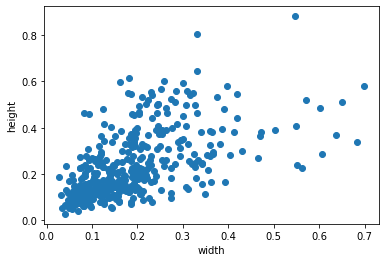

In [66]:
plt.scatter(data_points[:, 0], data_points[:, 1])
plt.xlabel('width')
plt.ylabel('height')

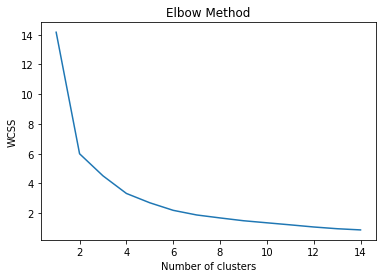

In [69]:
wcss = []
for c in range(1, 15):
    kmeans = KMeans(n_clusters=c, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_points)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

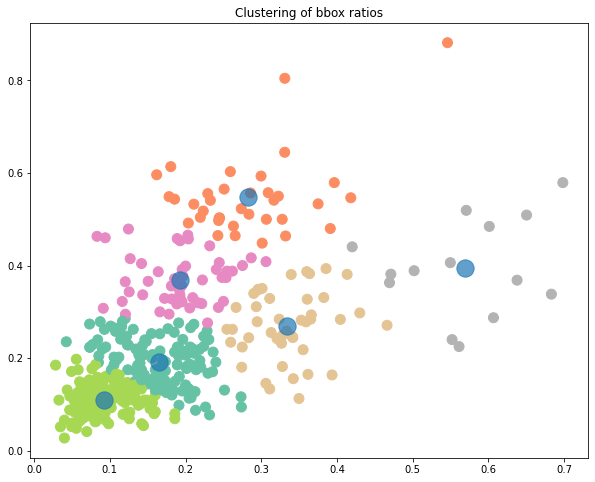

In [75]:
# Choose 4 or 6 as the number of clusters

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_points)
plt.figure(figsize=(10,8))
plt.scatter(data_points[:,0], data_points[:,1], c=pred_y, cmap="Set2", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=.7)
plt.title('Clustering of bbox ratios')
plt.show()